# Preparação inicial e Seleção de Datasets

Vamos investigar os datasets fornecidos para verificar quais os que melhor se adequam aos objetivos e restrições do exercicio. Com base nessa investigação vamos selecionar alguns datasets para as etapas seguintes

## Primeiro carregamos os datasets disponiveis

In [1]:
### Carregar as bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import minmax_scale

import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt

dataset_list = [
    "Abalone.csv",
    "Adult.csv",
    "Arrhythmia.csv",
    "Breast_cancer.csv",
    "Car.csv",
    "Credit.csv",
    "Dermatology.csv",
    "Diabetes.csv",
    "Ecoli.csv",
    "Glass.csv",
    "Image.csv",
    "Iris.csv",
    "Madelon.csv",
    "Movie_Dataset.csv",
    "Nursery.csv",
    "Semeion.csv",
    "SolarFlare.csv",
    "Waveform.csv",
    "Wine.csv",
    "Yeast.csv",
    "DELL/Abalone.csv",
    "DELL/base-1.csv",
    "DELL/base-10.csv",
    "DELL/base-2.csv",
    "DELL/base-3.csv",
    "DELL/base-4.csv",
    "DELL/base-5.csv",
    "DELL/base-6.csv",
    "DELL/base-7.csv",
    "DELL/base-8.csv",
    "DELL/base-9.csv",
    "NoClass/Abalone_NoClass.csv",
    "NoClass/Adult_noClass.csv",
    "NoClass/Adult.csv",
    "NoClass/Arrhythmia_PCA.csv",
    "NoClass/Breast_cancer_2.csv",
    "NoClass/Breast_cancer2.csv",
    "NoClass/Breast-cancer3.csv",
    "NoClass/Diabetes_NoClass.csv",
    "NoClass/Diabetes_NoClassNormOfNumber.csv",
    "NoClass/Diabetes_Reduced.csv",
    "NoClass/Diabetes-labels.csv",
    "NoClass/Diabetes.csv",
    "NoClass/Image.csv",
    "NoClass/Nursery.csv",
    "NoClass/NurseryNominalToBinary_NoClass.csv",
    "NoClass/NurseryNominalToBinary.csv",
    "NoClass/Pessoa_transformada.csv",
    "NoClass/Pessoa.csv",
    "NoClass/Pessoa02.csv",
    "NoClass/PessoaNormBinary.csv"
]
base_url = "https://raw.githubusercontent.com/gilcesarf/imd3002-202502/main/Aula08/data/"

dslist = []
### Le todos os datasets
for datasetName in dataset_list:
  print("Lendo ", datasetName)

  dslist.append({ "name": datasetName, "dataset": pd.read_csv(base_url + datasetName,encoding='utf-8')})


Lendo  Abalone.csv
Lendo  Adult.csv
Lendo  Arrhythmia.csv
Lendo  Breast_cancer.csv
Lendo  Car.csv
Lendo  Credit.csv
Lendo  Dermatology.csv
Lendo  Diabetes.csv
Lendo  Ecoli.csv
Lendo  Glass.csv
Lendo  Image.csv
Lendo  Iris.csv
Lendo  Madelon.csv
Lendo  Movie_Dataset.csv
Lendo  Nursery.csv
Lendo  Semeion.csv
Lendo  SolarFlare.csv
Lendo  Waveform.csv
Lendo  Wine.csv
Lendo  Yeast.csv
Lendo  DELL/Abalone.csv
Lendo  DELL/base-1.csv
Lendo  DELL/base-10.csv
Lendo  DELL/base-2.csv
Lendo  DELL/base-3.csv
Lendo  DELL/base-4.csv
Lendo  DELL/base-5.csv
Lendo  DELL/base-6.csv
Lendo  DELL/base-7.csv
Lendo  DELL/base-8.csv
Lendo  DELL/base-9.csv
Lendo  NoClass/Abalone_NoClass.csv
Lendo  NoClass/Adult_noClass.csv
Lendo  NoClass/Adult.csv
Lendo  NoClass/Arrhythmia_PCA.csv
Lendo  NoClass/Breast_cancer_2.csv
Lendo  NoClass/Breast_cancer2.csv
Lendo  NoClass/Breast-cancer3.csv
Lendo  NoClass/Diabetes_NoClass.csv
Lendo  NoClass/Diabetes_NoClassNormOfNumber.csv
Lendo  NoClass/Diabetes_Reduced.csv
Lendo  NoCla

## Depois descobrimos o conjunto de todos os tipos de todas as colunas dos datasets

In [2]:
all_types = set()
for d in dslist:
    tipos = d["dataset"].dtypes.apply(lambda x: str(x))
    all_types.update(tipos)

# Ordena os tipos para ficar consistente
all_types = sorted(all_types)

all_types

['float64', 'int64', 'object']

## E agora fazemos a contagem de colunas para cada tipo em cada um dos datasets

In [3]:
allInfo = pd.DataFrame([{
    "Dataset": d["dataset"],
    "Nome": d["name"],
    "Linhas": d["dataset"].shape[0],
    "Colunas": d["dataset"].shape[1],
    **{f"Tipos_{t}": (d["dataset"].dtypes.apply(lambda x: str(x)) == t).sum() for t in all_types}
} for d in dslist])

allInfo.loc[:, allInfo.columns != "Dataset"]

,Nome,Linhas,Colunas,Tipos_float64,Tipos_int64,Tipos_object
0,Abalone.csv,4177,9,7,1,1
1,Adult.csv,16281,15,0,6,9
2,Arrhythmia.csv,452,261,194,67,0
3,Breast_cancer.csv,699,10,0,8,2
4,Car.csv,1728,7,0,0,7
5,Credit.csv,1000,21,0,7,14
6,Dermatology.csv,366,35,0,34,1
7,Diabetes.csv,768,9,2,6,1
8,Ecoli.csv,336,8,7,0,1
9,Glass.csv,214,10,9,0,1


## Marcamos os datasets que respeitam as restrições impostas pelo exercicio

Ou seja:
- com mais de 20 colunas
- com ao menos uma coluna de tipo object
- ao menos uma coluna numerica (int ou float)

Mas também adicionamos por conta própria qualquer dataset que possua mais de 200 colunas, independente de qualquer outro critério. A idéia é ter datasets com maiores quantidades de colunas para ver o desempenho dos algoritmos.

In [4]:
# Agora adicionamos candidato usando as colunas criadas

allInfo["candidato"] = (
    ((allInfo["Colunas"] > 20) &
    (allInfo.get("Tipos_object", 0) > 0) &
    (
        (allInfo.get("Tipos_float64", 0) > 0) |
        (allInfo.get("Tipos_int64", 0) > 0)
    )) |
    (allInfo["Colunas"] > 200)
)

allInfo.loc[:, allInfo.columns != "Dataset"]


,Nome,Linhas,Colunas,Tipos_float64,Tipos_int64,Tipos_object,candidato
0,Abalone.csv,4177,9,7,1,1,False
1,Adult.csv,16281,15,0,6,9,False
2,Arrhythmia.csv,452,261,194,67,0,True
3,Breast_cancer.csv,699,10,0,8,2,False
4,Car.csv,1728,7,0,0,7,False
5,Credit.csv,1000,21,0,7,14,True
6,Dermatology.csv,366,35,0,34,1,True
7,Diabetes.csv,768,9,2,6,1,False
8,Ecoli.csv,336,8,7,0,1,False
9,Glass.csv,214,10,9,0,1,False


## Para finalizar a analise inicial, descartamos os datasets que não foram selecionados.

Deixamos agora apenas os datasets que serão efetivamente utilizados no exercicio.

In [5]:
allInfo = allInfo[allInfo["candidato"]].reset_index(drop=True)

allInfo = allInfo.drop(columns=["candidato"])

allInfo.loc[:, allInfo.columns != "Dataset"]

,Nome,Linhas,Colunas,Tipos_float64,Tipos_int64,Tipos_object
0,Arrhythmia.csv,452,261,194,67,0
1,Credit.csv,1000,21,0,7,14
2,Dermatology.csv,366,35,0,34,1
3,Madelon.csv,2600,501,0,501,0
4,Semeion.csv,1593,257,0,257,0
5,NoClass/NurseryNominalToBinary.csv,12960,27,0,26,1


# Pré-processamento

Primeiramente precisamos aplicar o pré-processamento sobre as bases selecionados. Vamos investigar os tipos de datos de cada dataset.

## Tratamento de Missing Values

Não existem missing values nas bases selecionadas, como podemos ver abaixo:

In [6]:
def mostrar_colunas_tipo_objeto(df: pd.DataFrame):
    object_cols = df.select_dtypes(include=["object"])

    if object_cols.shape[1] == 0:
        print("Nenhuma coluna do tipo object encontrada.")
        return

    print(f"Colunas do tipo object ({object_cols.shape[1]} encontradas):")
    print(list(object_cols.columns))
    display(object_cols.sample(10, random_state=42))

    return object_cols

for row in allInfo.itertuples():
    dataset = row.Dataset
    print(row.Nome)

    missing_values = dataset.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    if not missing_values.empty:
        print("Missing Values:")
        print(missing_values)
    else:
        print("Sem Missing Values.")

    # print(row.Dataset)
    mostrar_colunas_tipo_objeto(dataset)

    print()
    print()
    print("#########")
    print()


Arrhythmia.csv
Sem Missing Values.
Nenhuma coluna do tipo object encontrada.


#########

Credit.csv
Sem Missing Values.
Colunas do tipo object (14 encontradas):
['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
521,<0,'existing paid',radio/tv,<100,1<=X<4,'female div/dep/mar',none,'real estate',none,own,skilled,none,yes,bad
737,<0,'existing paid','new car',100<=X<500,1<=X<4,'male single',none,car,none,own,'unskilled resident',yes,yes,good
740,<0,'all paid','new car',100<=X<500,4<=X<7,'male single',none,car,bank,own,skilled,none,yes,good
660,>=200,'existing paid',radio/tv,<100,1<=X<4,'male mar/wid',none,'real estate',none,rent,skilled,none,yes,good
411,'no checking','critical/other existing credit','used car',<100,4<=X<7,'male single',none,car,none,own,'high qualif/self emp/mgmt',yes,yes,good
678,<0,'existing paid',radio/tv,<100,>=7,'male single',none,'real estate',bank,rent,'unskilled resident',none,yes,good
626,>=200,'existing paid',furniture/equipment,<100,1<=X<4,'male single',none,'real estate',none,own,skilled,yes,yes,good
513,0<=X<200,'delayed previously',radio/tv,<100,1<=X<4,'male mar/wid','co applicant','real estate',none,rent,skilled,none,yes,good
859,'no checking','existing paid','new car',100<=X<500,1<=X<4,'male single',guarantor,'real estate',none,rent,skilled,none,no,good
136,'no checking','delayed previously','used car',>=1000,1<=X<4,'male single',none,car,none,own,skilled,none,yes,good




#########

Dermatology.csv
Sem Missing Values.
Colunas do tipo object (1 encontradas):
['ATT34']


,ATT34
193,18
33,?
15,40
310,50
57,29
183,20
76,33
119,0
152,46
126,8




#########

Madelon.csv
Sem Missing Values.
Nenhuma coluna do tipo object encontrada.


#########

Semeion.csv
Sem Missing Values.
Nenhuma coluna do tipo object encontrada.


#########

NoClass/NurseryNominalToBinary.csv
Sem Missing Values.
Colunas do tipo object (1 encontradas):
['class']


,class
6407,not_recom
6301,spec_prior
304,priority
12520,spec_prior
2417,not_recom
6312,priority
8246,not_recom
2655,priority
6249,priority
5206,priority




#########



## Limpando Class

Descartamos a ultima coluna de cada dataset se o nome dela é "class".

In [7]:
def drop_last_if_class(df: pd.DataFrame) -> pd.DataFrame:
    """
    Retorna uma CÓPIA do DataFrame sem a última coluna
    se (e somente se) o nome dessa última coluna for 'class'.
    A comparação é case sensitive. O df original não é alterado.
    """
    if df.shape[1] == 0:            # sem colunas
        return df.copy()

    if df.columns[-1] == "class":   # case sensitive, sem strip
        return df.iloc[:, :-1].copy()

    return df.copy()

for info in allInfo.itertuples():
    ds = drop_last_if_class(info.Dataset)
    allInfo.at[info.Index, "Dataset" ] = ds

## Limpando Dermatology.csv

Podemos observar que Dermatology.csv possui a coluna ["ATT34"] do tipo object, mas é possível ver que alguns valores possuem uma interrogação. Vamos substituir os valores não numericos desse atributo por NaN.

In [8]:
def replace_non_numeric_with_nan(df: pd.DataFrame, cols):
    """
    Substitui valores não numéricos por NaN nas colunas especificadas.

    Parâmetros:
        df   : DataFrame
        cols : str ou lista de colunas

    Retorno:
        DataFrame com as colunas alteradas
    """
    df_copy = df.copy()

    if isinstance(cols, str):
        cols = [cols]

    for col in cols:
        df_copy[col] = pd.to_numeric(df_copy[col], errors="coerce")

    return df_copy

Dermatology = allInfo.loc[2, ]

d_linha = replace_non_numeric_with_nan(Dermatology.Dataset, ["ATT34"])

print(d_linha.ATT34.value_counts(dropna=False))
print()
print(f"[ATT34]: {d_linha.ATT34.isna().sum()} NaN de {d_linha.ATT34.count() + d_linha.ATT34.isna().sum()}")
#

ATT34
40.0    17
50.0    17
27.0    16
36.0    16
22.0    15
        ..
58.0     1
49.0     1
63.0     1
68.0     1
75.0     1
Name: count, Length: 61, dtype: int64

[ATT34]: 8 NaN de 366


### Substituindo NaN por mediana

Vamos substituir esses valores por NaN e avaliar a distribuição depois dessa mudança. Por fim substituimos os NaN pela mediana.

In [9]:
print("Moda (d_linha.ATT34.mode()): ")
print(d_linha.ATT34.mode())

print("Mediana (d_linha.ATT34.median()): ")
print(d_linha.ATT34.median())

d_linha["ATT34"] = d_linha["ATT34"].fillna(d_linha["ATT34"].median())

print(f"[ATT34]: {d_linha.ATT34.isna().sum()} NaN de {d_linha.ATT34.count() + d_linha.ATT34.isna().sum()}")
mostrar_colunas_tipo_objeto(d_linha)

#devolvendo o dataset limpo para o conjunto
allInfo.at[2, "Dataset"] = d_linha

Moda (d_linha.ATT34.mode()): 
0    40.0
1    50.0
Name: ATT34, dtype: float64
Mediana (d_linha.ATT34.median()): 
35.0
[ATT34]: 0 NaN de 366
Nenhuma coluna do tipo object encontrada.


## Limpando Credit.csv

Vamos primeiro observar de forma geral o dataset Credit, mostrando as informações básicas e algumas instancias de dados.

In [10]:
Credit = allInfo.loc[1, ]
Credit.Dataset.info()
Credit.Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes


### Avaliando variabilidade de elementos

Avaliamos os atributos categoricos quanto a variabilidade de seus elementos.

Considerando apenas os atributos categoricos, geramos um resumo que mostra os atributos, a quantidade de valores unicos e quais são esses valores, separados em cada coluna, preenchendo com NaN aquelas celular vazias.

In [11]:
def resumo_objetos(df: pd.DataFrame, max_uniques: int = None) -> pd.DataFrame:
    """
    Gera resumo de colunas object: nunique + valores únicos em colunas separadas.

    Parâmetros:
        df          : DataFrame
        max_uniques : número máximo de valores únicos para incluir (None = todos)

    Retorna:
        DataFrame resumo
    """
    obj_cols = df.select_dtypes(include=["object"])

    data = []
    for col in obj_cols.columns:
        uniques = obj_cols[col].unique().tolist()
        if max_uniques:
            uniques = uniques[:max_uniques]
        row = {"atributo": col, "nunique": len(obj_cols[col].unique())}
        for i, val in enumerate(uniques, 1):
            row[f"val_{i}"] = val
        data.append(row)

    return pd.DataFrame(data)


resumo_colunas_categoricas = resumo_objetos( Credit.Dataset )
resumo_colunas_categoricas

,atributo,nunique,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10
0,checking_status,4,<0,0<=X<200,'no checking',>=200,NaN,NaN,NaN,NaN,NaN,NaN
1,credit_history,5,'critical/other existing credit','existing paid','delayed previously','no credits/all paid','all paid',NaN,NaN,NaN,NaN,NaN
2,purpose,10,radio/tv,education,furniture/equipment,'new car','used car',business,'domestic appliance',repairs,other,retraining
3,savings_status,5,'no known savings',<100,500<=X<1000,>=1000,100<=X<500,NaN,NaN,NaN,NaN,NaN
4,employment,5,>=7,1<=X<4,4<=X<7,unemployed,<1,NaN,NaN,NaN,NaN,NaN
5,personal_status,4,'male single','female div/dep/mar','male div/sep','male mar/wid',NaN,NaN,NaN,NaN,NaN,NaN
6,other_parties,3,none,guarantor,'co applicant',NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,property_magnitude,4,'real estate','life insurance','no known property',car,NaN,NaN,NaN,NaN,NaN,NaN
8,other_payment_plans,3,none,bank,stores,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,housing,3,own,'for free',rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transformar em binario os valores de own_telephone e foreign_worker.

Os dois atributos mencionados possuem caracteristica binária, ou seja, apenas dois valores possíveis. Além disso, o significado deles é exatamente de presença/ausencia. Logo, são candidatos perfeitos a substituição por valores numericos 0/1.


In [12]:
# dicionário de tradução
mapa = {"yes": 1, "no": 0, "none": 0}

cols = ["own_telephone", "foreign_worker"]
for col in cols:
    Credit.Dataset[col] = Credit.Dataset[col].map(mapa).astype("int64")

# recalcula colunas categoricas sem o class
resumo_colunas_categoricas = resumo_objetos( Credit.Dataset )
resumo_colunas_categoricas

,atributo,nunique,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10
0,checking_status,4,<0,0<=X<200,'no checking',>=200,NaN,NaN,NaN,NaN,NaN,NaN
1,credit_history,5,'critical/other existing credit','existing paid','delayed previously','no credits/all paid','all paid',NaN,NaN,NaN,NaN,NaN
2,purpose,10,radio/tv,education,furniture/equipment,'new car','used car',business,'domestic appliance',repairs,other,retraining
3,savings_status,5,'no known savings',<100,500<=X<1000,>=1000,100<=X<500,NaN,NaN,NaN,NaN,NaN
4,employment,5,>=7,1<=X<4,4<=X<7,unemployed,<1,NaN,NaN,NaN,NaN,NaN
5,personal_status,4,'male single','female div/dep/mar','male div/sep','male mar/wid',NaN,NaN,NaN,NaN,NaN,NaN
6,other_parties,3,none,guarantor,'co applicant',NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,property_magnitude,4,'real estate','life insurance','no known property',car,NaN,NaN,NaN,NaN,NaN,NaN
8,other_payment_plans,3,none,bank,stores,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,housing,3,own,'for free',rent,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Aplicando Count Encoding aos demais atributos

Vamos avaliar a factibilidade de aplicar count encoding nas demais colunas.

In [13]:
print("\n")
obj_cols = Credit.Dataset.select_dtypes(include=["object"])
for atributo in obj_cols:
  # print(atributo)
  print(Credit.Dataset[atributo].value_counts())
  print()



checking_status
'no checking'    394
<0               274
0<=X<200         269
>=200             63
Name: count, dtype: int64

credit_history
'existing paid'                     530
'critical/other existing credit'    293
'delayed previously'                 88
'all paid'                           49
'no credits/all paid'                40
Name: count, dtype: int64

purpose
radio/tv                280
'new car'               234
furniture/equipment     181
'used car'              103
business                 97
education                50
repairs                  22
'domestic appliance'     12
other                    12
retraining                9
Name: count, dtype: int64

savings_status
<100                  603
'no known savings'    183
100<=X<500            103
500<=X<1000            63
>=1000                 48
Name: count, dtype: int64

employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64

personal_statu

Analisando os valores e as repetições de contagens para cada atributo, observamos que apenas o atributo purpose apresenta repetições para os valores other e 'domestic appliance', cada um com contagem de 12, de um total de 1000 registros. Ou seja, aplicar count encoding vai provocar perda de informação para esses dois atributos, representando (12+12)/1000 = 2,4% do total. Para efeitos didaticos do exercicio, vamos assumir que essa perda é aceitável e aplicar a técnica de count enconding para todas as colunas do dataset.

In [14]:
for col in obj_cols.columns:
    # contar frequências
    counts = Credit.Dataset[col].value_counts()
    # mapear categorias -> contagem
    Credit.Dataset[col] = Credit.Dataset[col].map(counts)

Credit.Dataset.sample(n=10, random_state=42)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
521,274,18,530,280,3190,603,339,2,310,907,2,282,24,814,713,1,630,1,0,1
737,274,18,530,234,4380,103,339,3,548,907,4,332,35,814,713,1,200,2,1,1
740,274,24,49,234,2325,103,174,2,548,907,3,332,32,139,713,1,630,1,0,1
660,63,12,530,280,1297,603,339,3,92,907,4,282,23,814,179,1,630,1,0,1
411,394,33,293,103,7253,603,174,3,548,907,2,332,35,814,713,2,148,1,1,1
678,274,24,530,280,2384,603,253,4,548,907,4,282,64,139,179,1,200,1,0,1
626,63,6,530,181,2116,603,339,2,548,907,2,282,41,814,713,1,630,1,1,1
513,269,12,88,280,585,603,339,4,92,41,4,282,20,814,179,2,630,1,0,1
859,394,9,530,234,3577,103,339,1,548,52,2,282,26,814,179,1,630,2,0,0
136,394,27,88,103,8613,48,339,2,548,907,2,332,27,814,713,2,630,1,0,1


Para comprovar que todas as colunas foram convertidas a numeros, vamos recalcular o resumo e mostrar que agora está vazio. Ou seja, já não existem colunas categoricas em Credit.csv

In [15]:
# devolve Credit para o dataset sem a coluna class
allInfo.at[1, "Dataset" ] = Credit.Dataset

# recalcula resumo de objetos para mostrar que esta vazio
resumo_colunas_categoricas = resumo_objetos( Credit.Dataset )
resumo_colunas_categoricas

""


## Normalização de dados

Agora vamos normalizar todos os datasets do nosso conjunto selecionado e limpo. Primeiro criamos a função de normalização.

In [16]:
def normalizar_dataset(dataset: pd.DataFrame, dtypes: list = ["int32", "int64", "float16", "float32", "float64"]) -> pd.DataFrame:
    """
    Normaliza colunas numéricas de um DataFrame usando Min-Max (0 a 1).

    Parâmetros:
        dataset : DataFrame original
        dtypes  : lista de tipos numéricos a considerar (default = int64 e float64)

    Retorna:
        DataFrame normalizado (cópia do original, mas com colunas numéricas normalizadas)
    """
    # Seleciona apenas as colunas numéricas do tipo desejado
    cols_num = dataset.select_dtypes(include=dtypes)
    colunas_numericas = cols_num.columns.tolist()

    # Cria cópia para não alterar o dataset original
    dataset_norm = dataset.copy()

    # Aplica normalização min-max
    dataset_norm[colunas_numericas] = dataset[colunas_numericas].apply(minmax_scale)

    return dataset_norm

E logo aplicamos a função a todos os datasets

In [17]:
for row in allInfo.itertuples():
    print(row.Nome)
    print()

    ds = normalizar_dataset(row.Dataset)

    print(ds)
    allInfo.at[row.Index, "Dataset" ] = ds

    print("#########")
    print()


Arrhythmia.csv

         att0  att1      att2      att3      att4      att5      att6  \
0    0.903614   0.0  0.125926  0.435294  0.270677  0.368321  0.501805   
1    0.674699   1.0  0.088889  0.341176  0.195489  0.332061  0.610108   
2    0.650602   0.0  0.099259  0.523529  0.624060  0.311069  0.555957   
3    0.662651   0.0  0.103704  0.517647  0.338346  0.385496  0.534296   
4    0.903614   0.0  0.125926  0.435294  0.248120  0.345420  0.462094   
..        ...   ...       ...       ...       ...       ...       ...   
447  0.638554   1.0  0.081481  0.376471  0.187970  0.379771  0.541516   
448  0.445783   0.0  0.125926  0.464706  0.338346  0.261450  0.465704   
449  0.433735   0.0  0.090370  0.364706  0.398496  0.335878  0.480144   
450  0.385542   1.0  0.074074  0.288235  0.285714  0.202290  0.555957   
451  0.939759   1.0  0.081481  0.376471  0.180451  0.242366  0.476534   

         att7      att8      att9  ...    att268    att269    att270  \
0    0.241758  0.590244  0.457478  

# Trabalhando com Correlação de Pearson

Primeiro criamos uma função que dado um dataframe pandas, retorna a correlação de person dos atributos numeros do dataframe.

In [18]:
def pearson_corr(df: pd.DataFrame) -> pd.DataFrame | None:
    """Retorna a matriz de correlação de Pearson entre colunas numéricas do df."""
    num = df.select_dtypes(include=["number"])
    if num.shape[1] < 2:
        return None  # menos de 2 colunas numéricas -> não há correlação
    return num.corr(method="pearson")

### Calculamos a matriz de Pearson

Aplicamos a correlação para cada elemento e armazenamos junto com a respectiva linha.

In [19]:
allInfo["CorrPearson"] = allInfo["Dataset"].apply(pearson_corr)

### Identificando as top N correlações

Identificamos as top 20 correlações mais fortes. Vamos desconsiderar a diagonal, bem como vamos considerar apenas o triangulo superior, ja que A->B = B->A. Para isso vamos criar uma função que calcula os top N correlatos. A função considera correlações positivas de forma diferente de correlações negativas, isto é, as top N **consideram** o sinal da correlação.

In [20]:
def top_correlatos(corr: pd.DataFrame, quantidade: int = 20, limiar: float = 0.80) -> pd.DataFrame:
    if not isinstance(corr, pd.DataFrame) or corr.empty or corr.shape[0] < 2:
        return pd.DataFrame(columns=["atributo_1","atributo_2","correlacao"])

    c = corr.copy() # copia para nao mexer no original
    np.fill_diagonal(c.values, np.nan) # descarta diagonal
    mask_sup = np.triu(np.ones_like(c, dtype=bool), k=1) #somente triangulo superior
    s = c.where(mask_sup).stack()         # pares únicos (i,j) -> r
    s = s[s >= limiar]                    # só r >= limiar

    # se nao sobrou nada retorna df vazip
    if s.empty:
        return pd.DataFrame(columns=["atributo_1","atributo_2","correlacao"])

    # top N por correlação (sem mexer na ordem original)
    top = s.nlargest(quantidade)

    # Reordena para exibição pela ordem original dos atributos
    df = top.rename_axis(["atributo_1","atributo_2"]).reset_index(name="correlacao")
    ordem = {col: i for i, col in enumerate(c.columns)}
    df["i_pos"] = df["atributo_1"].map(ordem)
    df["j_pos"] = df["atributo_2"].map(ordem)
    df = df.sort_values(["i_pos","j_pos"], kind="stable").drop(columns=["i_pos","j_pos"]).reset_index(drop=True)
    return df

LIMIAR = 0.80
TOP_N  = 20

allInfo["topN"] = allInfo["CorrPearson"].apply(top_correlatos, quantidade=TOP_N, limiar=LIMIAR)

for row in allInfo.itertuples():
  print(row.Nome)
  #print(row.CorrPearson)
  print(row.topN)
  print("")
  print("#######")

Arrhythmia.csv
   atributo_1 atributo_2  correlacao
0       att18     att163    0.909704
1       att54     att193    0.932293
2       att66     att203    0.941517
3       att74     att213    0.871637
4      att115     att243    0.966664
5      att126     att253    0.881401
6      att138     att263    0.933495
7      att150     att273    0.997769
8      att171     att211    0.913032
9      att175     att215    0.864746
10     att177     att217    0.865314
11     att178     att218    0.880143
12     att181     att211    0.922657
13     att187     att217    0.917264
14     att188     att218    0.887449
15     att258     att268    0.865112
16     att261     att271    0.879162
17     att265     att275    0.898566
18     att266     att276    0.864417
19     att268     att278    0.881998

#######
Credit.csv
Empty DataFrame
Columns: [atributo_1, atributo_2, correlacao]
Index: []

#######
Dermatology.csv
   atributo_1 atributo_2  correlacao
0        ATT6      ATT12    0.907044
1        ATT6    

### Montamos os mapas de calor a partir das top N correlacoes

E agora mostramos os atributos das top 20 maiores correlações para cada um dos datasets. Repare que aparecem todos os atributos dessas top 20 correlações, ou seja, podem aparecer até 40 atributos (e não 20 como poderiamos pensar de forma equivocada)

Arrhythmia.csv



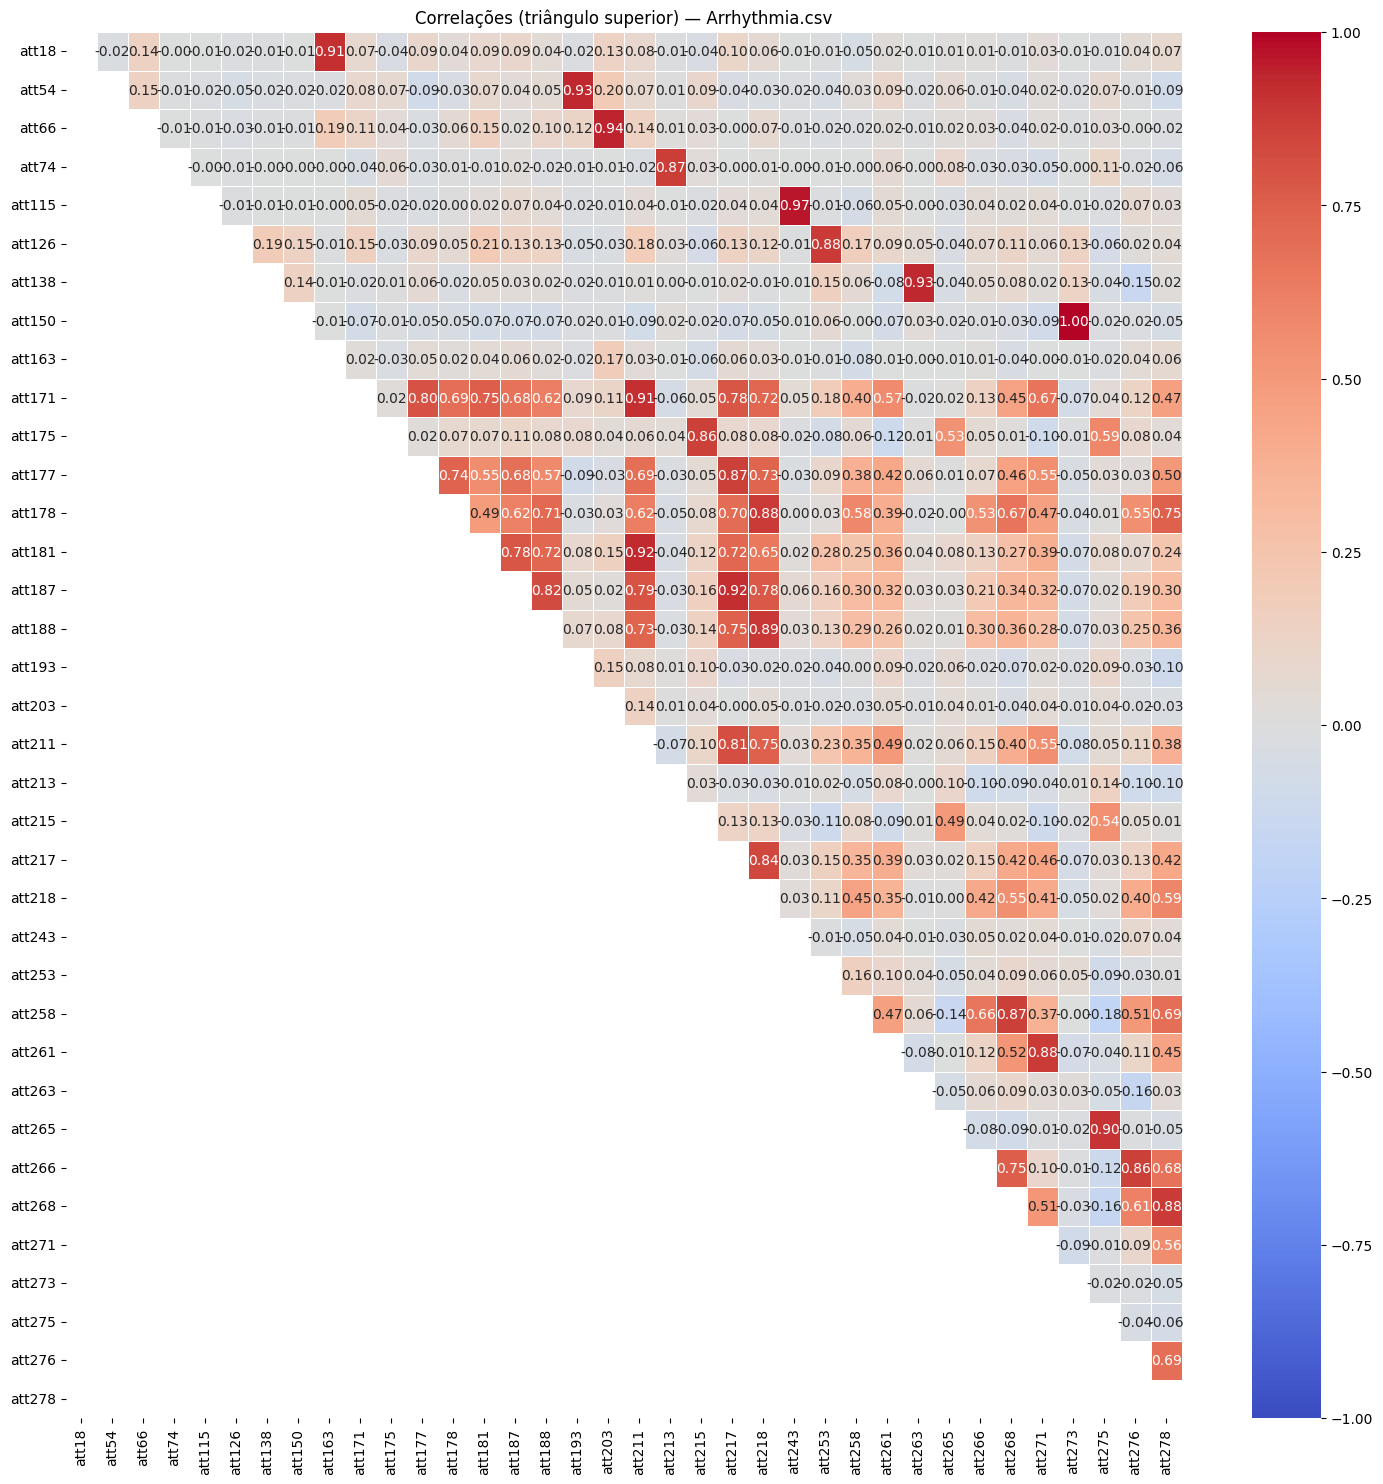

#######

Credit.csv
Nenhuma correlação ≥ 0.80.
#######

Dermatology.csv



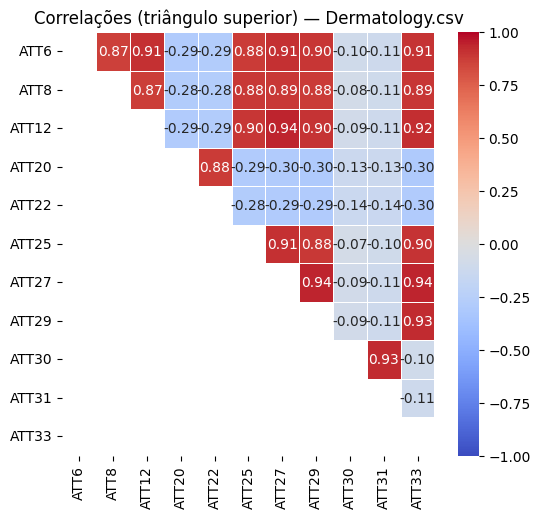

#######

Madelon.csv



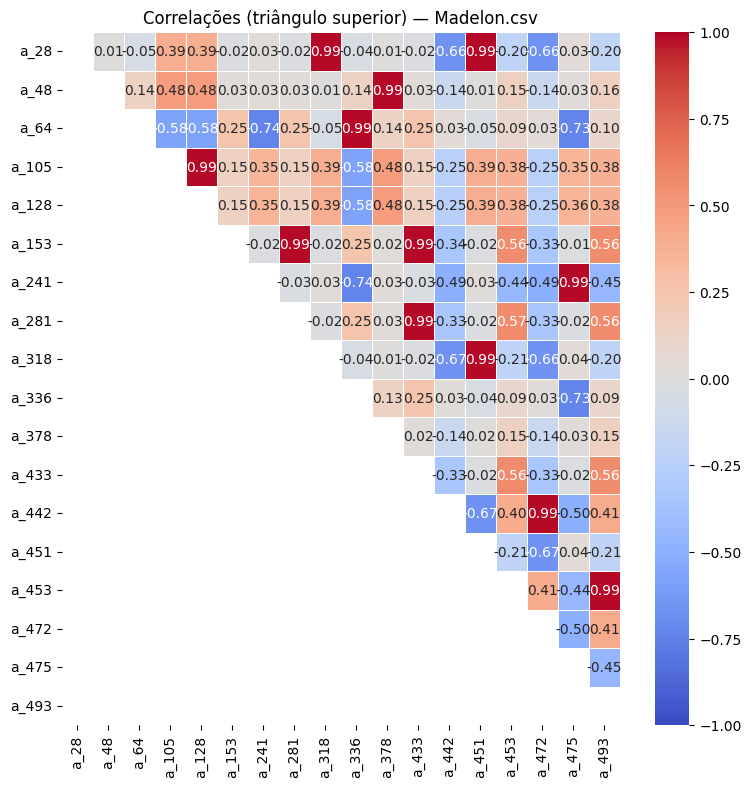

#######

Semeion.csv



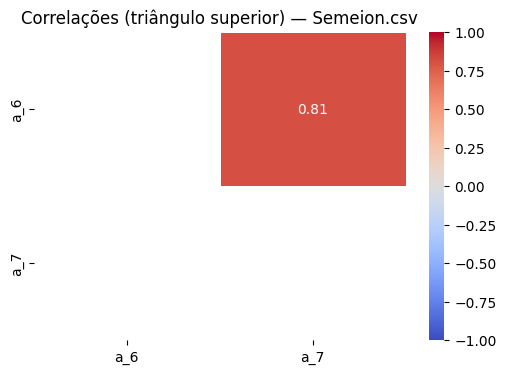

#######

NoClass/NurseryNominalToBinary.csv
Nenhuma correlação ≥ 0.80.
#######



In [21]:



for row in allInfo.itertuples():
    nome = getattr(row, "Nome", getattr(row, "Name", f"idx_{row.Index}"))
    corr = row.CorrPearson
    top  = row.topN

    if not isinstance(corr, pd.DataFrame) or corr.empty:
        print(f"{nome}\nSem matriz de correlação disponível.\n#######\n")
        continue

    if top is None or top.empty:
        print(f"{nome}\nNenhuma correlação ≥ {LIMIAR:.2f}.\n#######\n")
        continue

    # atributos envolvidos nos TOP_N pares
    feats = pd.unique(pd.concat([top["atributo_1"], top["atributo_2"]], ignore_index=True))

    # mantem a ordem original das colunas
    ordem = {col: i for i, col in enumerate(corr.columns)}
    feats = sorted((f for f in feats if f in ordem), key=lambda x: ordem[x])

    # submatriz com TODOS os r entre os atributos selecionados
    sub = corr.loc[feats, feats]

    # máscara para mostrar apenas o triângulo superior SEM diagonal
    mask = np.tril(np.ones(sub.shape, dtype=bool), k=0)  # True = esconde (diagonal + abaixo)

    # tamanho proporcional
    h = max(4, 0.5 * len(feats))
    w = max(6, 0.5 * len(feats))

    print(f"{nome}\n")
    plt.figure(figsize=(w, h))
    ax = sn.heatmap(
        sub, mask=mask,
        vmin=-1, vmax=1, center=0, cmap="coolwarm",
        annot=True, fmt=".2f", linewidths=0.5, linecolor="white"
    )
    ax.set_title(f"Correlações (triângulo superior) — {nome}")
    plt.show()
    print("#######\n")


### Limpando os atributos que geram as correlações TOP N

Criamos uma função para limpar as colunas que geram as top N correlações. Escolhemos remover a segunda coluna do par por simplicidade. A função retorna o dataframe e a matriz de correlação sem os atributos limpos, e a lista de atributos eliminados.

In [22]:
def limpar_topN(df: pd.DataFrame, corr: pd.DataFrame, top_pairs: pd.DataFrame):
    """
    Remove 1 atributo por par (sempre 'atributo_2') e retorna:
    (df_sem_atributos, corr_pearson_submatriz, lista_drops)
    """
    # se top_pairs não for DataFrame ou for vazio → não remove nada
    if not isinstance(top_pairs, pd.DataFrame) or top_pairs.empty:
        remain = list(df.columns)
        return df.copy(), corr.loc[remain, remain].copy(), []

    # atributos a remover = segundo de cada par (deduplicado, ordem preservada)
    drops = list(dict.fromkeys(top_pairs["atributo_2"]))
    drops = [c for c in drops if c in df.columns]

    # colunas que ficam
    remain = [c for c in df.columns if c not in drops]

    # novo DF e correlação = submatriz da original
    df2   = df[remain].copy()
    corr2 = corr.loc[remain, remain].copy()
    return df2, corr2, drops


Agora aplicamos a função aos datasets.

In [23]:
# prepara atributos novos.
# **** Não sei por que a atribuicao no loop nao funciona sem essa definicao inicial
allInfo["Dataset_Pearson"] = None
allInfo["CorrPearson_Limpa"]    = None

for row in allInfo.itertuples():
    df   = row.Dataset
    corr = row.CorrPearson
    top  = getattr(row, "topN", None)

    df2, corr2, drops = limpar_topN(df, corr, top)
    allInfo.at[row.Index, "Dataset_Pearson"]   = df2
    allInfo.at[row.Index, "CorrPearson_Limpa"] = corr2
    print(f"Dataset: {row.Nome}")
    print("Colunas Eliminadas:")
    print(drops)
    print("######")
    print("")



Dataset: Arrhythmia.csv
Colunas Eliminadas:
['att163', 'att193', 'att203', 'att213', 'att243', 'att253', 'att263', 'att273', 'att211', 'att215', 'att217', 'att218', 'att268', 'att271', 'att275', 'att276', 'att278']
######

Dataset: Credit.csv
Colunas Eliminadas:
[]
######

Dataset: Dermatology.csv
Colunas Eliminadas:
['ATT12', 'ATT25', 'ATT27', 'ATT29', 'ATT33', 'ATT22', 'ATT31']
######

Dataset: Madelon.csv
Colunas Eliminadas:
['a_318', 'a_451', 'a_378', 'a_336', 'a_128', 'a_281', 'a_433', 'a_475', 'a_472', 'a_493']
######

Dataset: Semeion.csv
Colunas Eliminadas:
['a_7']
######

Dataset: NoClass/NurseryNominalToBinary.csv
Colunas Eliminadas:
[]
######



# Calculando PCA

Definimos uma função que calcula o PCA conforme os criterios definidos no exercicio: “√n e ≥90% de variância". A regra aplicada será:

- Calcular k_sqrt = floor(√n) (limitado por p e por n);
- Calcular quantos componentes são necessários para atingir 90% (k_90);
- Escolher k = k_sqrt se k_90 ≤ k_sqrt, cumprindo os dois requisitos;
- Caso contrário, k = k_90 (não dá para manter 90% com apenas √n componentes).


In [29]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

def pca_sqrt90(df: pd.DataFrame, variancia_min: float = 0.90):
    """
    Aplica PCA escolhendo k = floor(sqrt(n)) se isso manter >= variancia_min;
    caso contrário, usa o menor k que atinge variancia_min (k_90).

    Retorna:
      df_pca : DataFrame com colunas PC1..PCk
      meta   : dict com n, p, k_sqrt, k_90, k_escolhido,
               variancia_acum_escolhida, variancia_acum_k_sqrt,
               variancia_acum_k_90, perda_vs_k_90_se_usar_k_sqrt
    """
    n, p = df.shape

    k_max  = min(n, p)
    k_sqrt = max(1, min(int(np.floor(np.sqrt(n))), k_max))

    # Fit uma vez com k_max e reutiliza
    pca_full = PCA(n_components=k_max, svd_solver="full", random_state=42)
    pca_full.fit(df.values)
    cumvar = np.cumsum(pca_full.explained_variance_ratio_)

    # k_90 = nº mínimo de PCs para atingir variancia_min
    k_90 = int(np.searchsorted(cumvar, variancia_min) + 1)
    k_90 = min(k_90, k_max)

    # escolha final de k
    k = k_sqrt if k_90 <= k_sqrt else k_90

    # Projeção nos primeiros k PCs
    X_pca = pca_full.transform(df.values)[:, :k]
    cols  = [f"PC{i+1}" for i in range(k)]
    df_pca = pd.DataFrame(X_pca, columns=cols, index=df.index)

    # Métricas de variância
    var_k_sqrt  = float(cumvar[k_sqrt - 1])
    var_k90     = float(cumvar[k_90   - 1])
    var_chosen  = float(cumvar[k      - 1])
    perda_if_sqrt = max(0.0, var_k90 - var_k_sqrt)  # quanto faltaria se limitasse a k_sqrt

    meta = {
        "n": n, "p": p,
        "variancia_min": float(variancia_min),
        "k_sqrt": k_sqrt,
        "k_90": k_90,
        "k_escolhido": k,
        "variancia_acum_escolhida": var_chosen,
        "variancia_acum_k_sqrt": var_k_sqrt,
        "variancia_acum_k_90": var_k90,
        "perda_vs_k_90_se_usar_k_sqrt": perda_if_sqrt,
    }
    return df_pca, meta



Agora aplicamos a função a cada um dos datasets e retornamos os dados em allInfo.

In [32]:
# prepara atributos novos
allInfo["Dataset_PCA"] = None
allInfo["PCA_meta"]    = None


for row in allInfo.itertuples():
    print (f"Processando {row.Nome}")
    df = row.Dataset_Pearson
    df_pca, meta = pca_sqrt90(df, variancia_min=0.90)
    allInfo.at[row.Index, "Dataset_PCA"] = df_pca
    allInfo.at[row.Index, "PCA_meta"]    = meta

Processando Arrhythmia.csv
Processando Credit.csv
Processando Dermatology.csv
Processando Madelon.csv
Processando Semeion.csv
Processando NoClass/NurseryNominalToBinary.csv


Agora apresentamos uma tabela que resume os principais resultados obtidos.
Primeiro o valor do Dataset, n e p. Logo, os valores de k para floor(√n), k na variancia minima superior a 90%, e as respectivas variancias em cada um desses tres valores de k. Por fim, quanto seria a perda de informação (variancia de k_sqrt menos a variancia do k escolhido), se mantivessemos o valor de k = floor(√n). Isso advém do fato que as vezes não da pra manter 90% da informação com apenas √n componentes.

In [33]:

resumo_pca = pd.DataFrame([
    {"Nome": getattr(row, "Nome", getattr(row, "Name", f"idx_{row.Index}")), **row.PCA_meta}
    for row in allInfo.itertuples()
])

resumo_pca = resumo_pca[["Nome","n","p","k_sqrt","k_90","k_escolhido",
                         "variancia_acum_k_sqrt","variancia_acum_k_90",
                         "variancia_acum_escolhida","perda_vs_k_90_se_usar_k_sqrt"]].round(4)

resumo_pca

,Nome,n,p,k_sqrt,k_90,k_escolhido,variancia_acum_k_sqrt,variancia_acum_k_90,variancia_acum_escolhida,perda_vs_k_90_se_usar_k_sqrt
0,Arrhythmia.csv,452,243,21,63,63,0.6812,0.9019,0.9019,0.2207
1,Credit.csv,1000,20,20,14,20,1.0000,0.9058,1.0000,0.0000
2,Dermatology.csv,366,27,19,17,19,0.9385,0.9136,0.9385,0.0000
3,Madelon.csv,2600,490,50,378,378,0.1995,0.9001,0.9001,0.7006
4,Semeion.csv,1593,255,39,110,110,0.7187,0.9008,0.9008,0.1821
5,NoClass/NurseryNominalToBinary.csv,12960,26,26,17,26,1.0000,0.9233,1.0000,0.0000
